In [ ]:
"""
Team Code - ShRaRa
Team Members - Raj Hans Khoiwal (2003129)
               Rajat Singh      (2003130)
               Shivam Sinoliya  (2003132)
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2  
import copy
import seaborn as sns


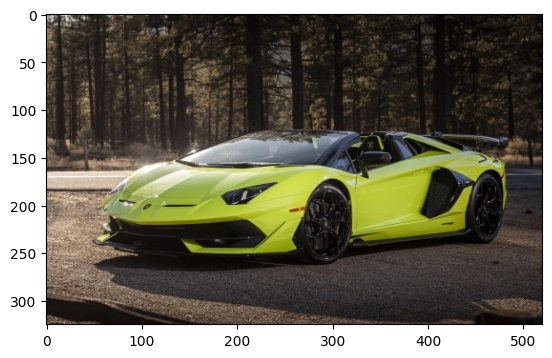

In [2]:
import urllib.request
# Load image from URL in RGB format
url = 'https://www.hdcarwallpapers.com/thumbs/2019/2020_lamborghini_aventador_svj_roadster-t2.jpg'
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

image = cv2.resize(img,dsize=(64,64))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image)


In [3]:
features = image.reshape((-1,3))
features = np.float32(features)

In [4]:
df_image=pd.DataFrame(features)
df_image

,0,1,2
0,213.0,215.0,204.0
1,221.0,222.0,214.0
2,186.0,185.0,180.0
3,117.0,116.0,112.0
4,100.0,96.0,95.0
...,...,...,...
168995,16.0,12.0,11.0
168996,17.0,13.0,12.0
168997,19.0,15.0,14.0
168998,21.0,17.0,16.0


In [5]:
def distance(x1, x2):
  return np.sqrt((np.square(np.array(x1) - np.array(x2))).sum())

In [6]:
def Estep(X, centroids):
    # Compute distances from each data point to each centroid
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=1)

    return labels

In [7]:
def Mstep(X, K, centroids, labels):
    # Update centroids
    for k in range(K):
        centroids[k, :] = np.mean(X[labels == k, :], axis=0)
    return centroids

In [8]:
def Convergence(prev_centroid1, new_centroid2):
    distance = np.linalg.norm(prev_centroid1 - new_centroid2)
    return distance

In [9]:
def CostFn(X, centroids, labels):
    k = len(centroids)
    cost = 0
    
    for i in range(k):
        X_i = X[labels == i]  # get the data points assigned to cluster i
        centroid_i = centroids[i]  # get the centroid of cluster i
        distances = np.linalg.norm(X_i - centroid_i, axis=1)  # calculate the distances from the centroid
        cost += np.sum(distances ** 2)  # sum up the squared distances
        
    return cost

In [10]:
J = []
def k_means(X, K):
    # Initialize centroids randomly
    new_centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    prev_centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    # centroid dimension K X No. of features
    
    delta = 0.00001
    iterations = 0

    while(Convergence(prev_centroids, new_centroids)>delta):
        iterations += 1

        labels = Estep(X, new_centroids)
        J.append(CostFn(X, new_centroids,labels))
        
        prev_centroids = copy.deepcopy(new_centroids)
        
        new_centroids = Mstep(X, K, new_centroids, labels)
        J.append(CostFn(X, new_centroids, labels))
            
    return labels, new_centroids



In [11]:
def segmentImage(df_image,K):
  X = df_image.values
  X.shape
  labels, centroids = k_means(X, K)
  centroids = np.uint8(centroids)
  labels = np.uint8(labels)
  segmented_pixels = centroids[labels.flatten()]
  segmented_image = segmented_pixels.reshape((image.shape))
  return segmented_image

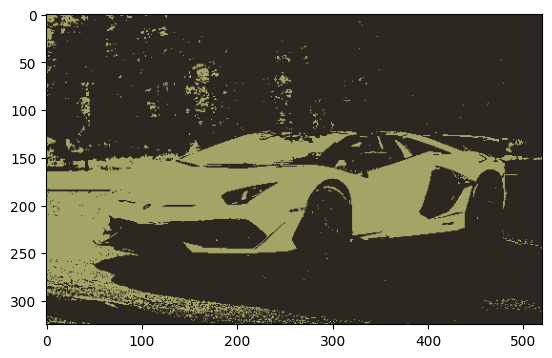

In [12]:
plt.imshow(segmentImage(df_image,2))

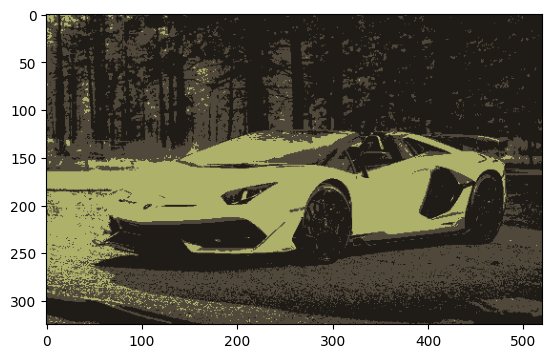

In [13]:
plt.imshow(segmentImage(df_image,3))

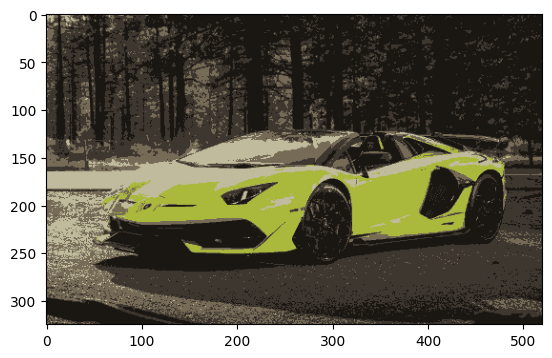

In [14]:
plt.imshow(segmentImage(df_image,5))

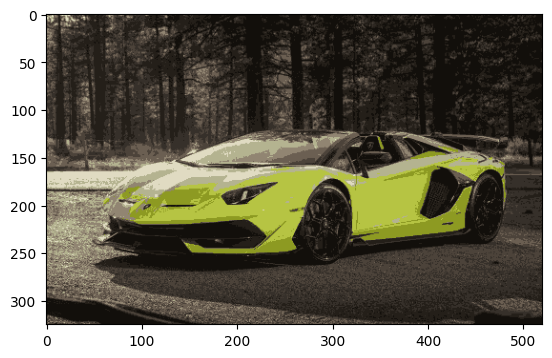

In [15]:
plt.imshow(segmentImage(df_image,10))